In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn.linear_model as sklm
import sklearn.model_selection as skms
import sklearn.datasets as skds
import sklearn.metrics as skm

In [3]:
!wget lalussoft.com/mldemos/lr2.txt

--2021-06-01 15:40:37--  http://lalussoft.com/mldemos/lr2.txt
Resolving lalussoft.com (lalussoft.com)... 34.198.109.148
Connecting to lalussoft.com (lalussoft.com)|34.198.109.148|:80... connected.
HTTP request sent, awaiting response... 302 Redirect
Location: https://lalussoft.com/mldemos/lr2.txt [following]
--2021-06-01 15:40:37--  https://lalussoft.com/mldemos/lr2.txt
Connecting to lalussoft.com (lalussoft.com)|34.198.109.148|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3891 (3.8K) [text/plain]
Saving to: ‘lr2.txt’

lr2.txt             100%[===================>]   3.80K  --.-KB/s    in 0s      

2021-06-01 15:40:38 (817 MB/s) - ‘lr2.txt’ saved [3891/3891]



In [4]:
data = pd.read_csv("lr2.txt")
data

,ex1,ex2,admitido
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
...,...,...,...
95,83.489163,48.380286,1
96,42.261701,87.103851,1
97,99.315009,68.775409,1
98,55.340018,64.931938,1


In [5]:
data_train, data_test = skms.train_test_split(data, test_size=0.2, shuffle=False)

In [6]:
xtrain = data_train[["ex1", "ex2"]]
xtest = data_test[["ex1", "ex2"]]
ytrain = data_train[["admitido"]]
ytest = data_test[["admitido"]]
x = data[["ex1", "ex2"]]
y = data["admitido"]


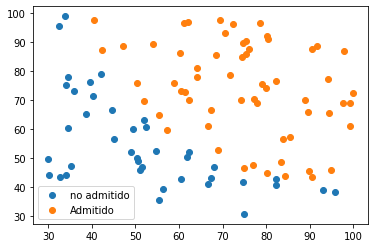

In [19]:
plt.scatter(x[y==0]["ex1"], x[y==0]["ex2"], label="no admitido")
plt.scatter(x[y==1]["ex1"], x[y==1]["ex2"], label="Admitido")
plt.legend()
plt.show()

In [8]:
modelo = sklm.LogisticRegression()
modelo.fit(xtrain, ytrain)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [9]:
print("T0 = {:.6f}, T1 = {:.6f}, T2={:.6f}".format(
    modelo.intercept_[0], modelo.coef_[0][0], modelo.coef_[0][1]))

T0 = -25.894110, T1 = 0.210192, T2=0.204096


un estudiante que obtiene 60 y 70 de notas respectivamente que probabilidad dtiene de ser admitido

In [10]:
modelo.predict([[60, 70]])

array([1])

In [11]:
#probabilidad
h = 1/(1+np.e**-(-25.894110+0.210192*60+0.204096*70))
h

0.7318698106252787

In [12]:
modelo.predict_proba([[60,70]])

array([[0.26812433, 0.73187567]])

In [14]:
yp = modelo.predict(xtest)
yp

array([1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1])

In [13]:
theta = [modelo.intercept_[0],modelo.coef_[0][0], modelo.coef_[0][1]]
theta

[-25.89410974654135, 0.21019211702556376, 0.2040963229580079]

In [15]:
skm.accuracy_score(ytest,yp)

0.9

In [16]:
skm.confusion_matrix(ytest,yp)

array([[ 3,  0],
       [ 2, 15]])

Linea de desicion

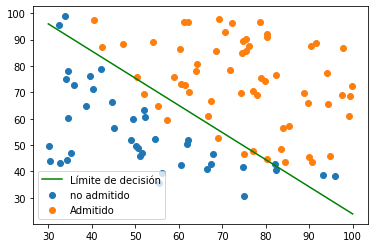

In [22]:
limx = [30,100] #puntos iniciales y finales de x para la recta de límite

# para obtener el límite de decisión igualamos Theta'X a cero:
# 0=theta[0] + theta[1]x1 + theta[2]x2
# -theta[2]x2 = theta[0] + theta[1]x1
# x2 = -(theta[0] + theta[1]x1) / theta[2]
limy = -(theta[0] + np.dot(theta[1],limx)) / theta[2]

plt.plot(limx,limy,label="Límite de decisión",color = "green")
plt.scatter(x[y==0]["ex1"], x[y==0]["ex2"], label="no admitido")
plt.scatter(x[y==1]["ex1"], x[y==1]["ex2"], label="Admitido")
plt.legend()
plt.show()

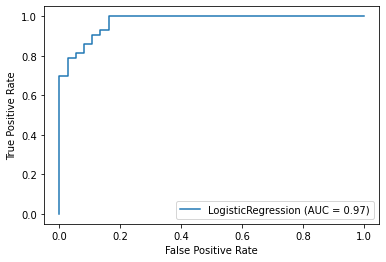

In [23]:
skm.plot_roc_curve(modelo,xtrain,ytrain)

CLASIFICACION MULTICLASE

In [ ]:
iris = skds.load_iris()
iris.data

In [25]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [26]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [33]:
x_nombres = ['sepal length','sepal width','petal length','petal width']

In [34]:
data = pd.DataFrame(iris.data, columns=x_nombres)
data["clase"] = iris.target
data["nombre_clase"] = iris.target_names[data["clase"]]
data

,sepal length,sepal width,petal length,petal width,clase,nombre_clase
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


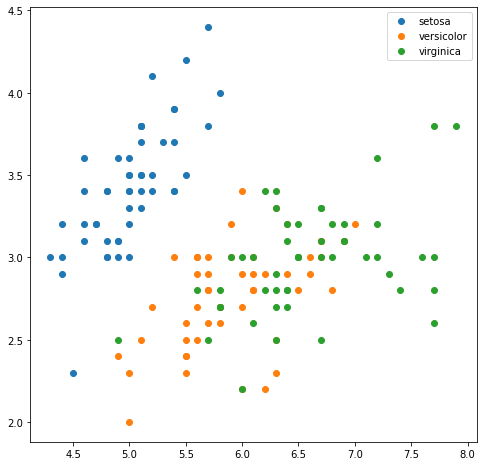

In [35]:
plt.figure(figsize=(8,8))
plt.scatter(data[data.clase==0].iloc[:,0], data[data.clase==0].iloc[:,1], label="setosa")
plt.scatter(data[data.clase==1].iloc[:,0], data[data.clase==1].iloc[:,1], label="versicolor")
plt.scatter(data[data.clase==2].iloc[:,0], data[data.clase==2].iloc[:,1], label="virginica")
plt.legend()

In [36]:
import seaborn as sns

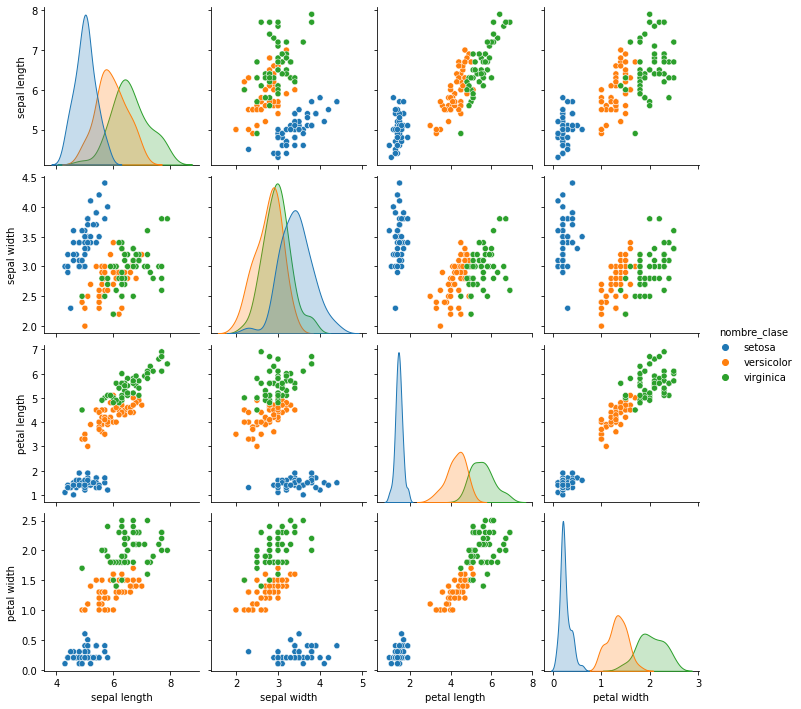

In [ ]:
sns.pairplot(data, hue="nombre_clase", x_vars=x_nombres, y_vars=x_nombres)

In [37]:
xtrain, xtest, ytrain, ytest = skms.train_test_split(data[x_nombres], data["clase"], test_size=0.3)

In [38]:
modelo = sklm.LogisticRegression(max_iter=1000)

In [39]:
modelo.fit(xtrain, ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [40]:
yp = modelo.predict(xtest)

In [41]:
skm.accuracy_score(ytest, yp)

0.9777777777777777

In [42]:
print(skm.classification_report(ytest, yp))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.94      0.97        17
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [43]:
skm.confusion_matrix(ytest, yp)

array([[15,  0,  0],
       [ 0, 16,  1],
       [ 0,  0, 13]])

In [44]:
modelo.coef_

array([[-0.48362104,  0.81539077, -2.22086719, -0.97131634],
       [ 0.50863741, -0.38423901, -0.16221347, -0.72783782],
       [-0.02501637, -0.43115176,  2.38308065,  1.69915416]])

**ejemplo 3:**

In [45]:
digitos = skds.load_digits()

In [ ]:
print(digitos.DESCR)

In [47]:
digitos.target

array([0, 1, 2, ..., 8, 9, 8])

In [46]:
digitos.images.shape

(1797, 8, 8)

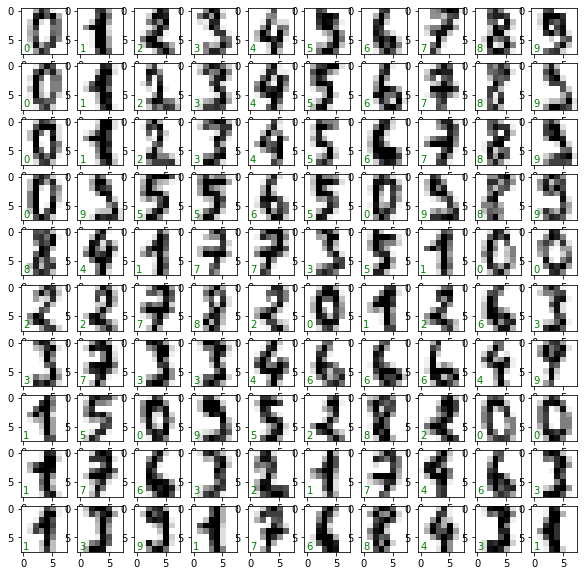

In [49]:
fig, axes = plt.subplots(10,10, figsize=(10,10))
for i, ax in enumerate(axes.flat):
  ax.imshow(digitos.images[i],cmap="binary")
  ax.text(0.05,0.05,digitos.target[i], color="green", transform=ax.transAxes)

In [51]:
x = digitos.data
y = digitos.target

In [53]:
xtrain, xtest, ytrain, ytest = skms.train_test_split(x,y,test_size=0.3)

In [54]:
modelo = sklm.LogisticRegression(max_iter=10000)

In [55]:
modelo.fit(xtrain,ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [56]:
yp= modelo.predict(xtest)

In [57]:
skm.accuracy_score(ytest,yp)

0.9592592592592593

In [58]:
skm.confusion_matrix(ytest,yp)

array([[51,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 42,  0,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 61,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 52,  0,  1,  0,  0,  4,  1],
       [ 0,  1,  0,  0, 63,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 44,  1,  0,  0,  2],
       [ 0,  2,  0,  0,  0,  0, 53,  0,  1,  0],
       [ 0,  1,  0,  0,  1,  0,  0, 46,  1,  0],
       [ 1,  1,  0,  0,  0,  0,  0,  0, 55,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  2, 51]])

0


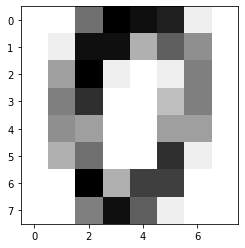

In [64]:
#ploteamos la imagen del test 3
plt.imshow(xtest[3].reshape(8,8), cmap="binary")

#imprimimos el verdadero valor del test 3
print(ytest[3])

In [65]:
#vemos la prediccion que es correcta
modelo.predict([xtest[3]])

array([0])

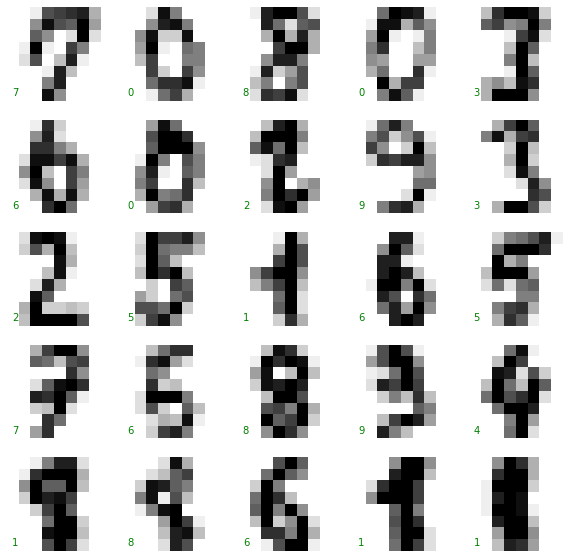

In [66]:
fig, axes = plt.subplots(5,5,figsize=(10,10))
for i,ax in enumerate(axes.flat):
  ax.imshow(xtest[i].reshape(8,8),cmap="binary") #imagenes del test
  ax.text(0.05,0.05,str(yp[i]), color="green", transform=ax.transAxes) #en texto las predicciones
  ax.axis("off")